In [1]:
from parlai.core.agents import create_agent
from parlai.core.worlds import create_task
from parlai.core.image_featurizers import ImageLoader

In [2]:
import cgi
import PIL.Image as IM
from base64 import b64decode
import io
import os
import base64

In [3]:
from os import walk

In [4]:
import numpy as np

In [11]:
from IPython.display import Image

In [15]:
import spacy
import pandas as pd
from nearpy.distances import CosineDistance

## Paths dev

In [53]:
# captioning
opt_download_path =''
opt_datapath=''
opt_parlai_home=''
opt_model_file = './transresnet/model'
opt_fixed_cands_path='./transresnet/candidates.txt'
personality_captions_path='./personality_captions/train.json'

## Captioning utils

In [54]:
opt={'init_opt': None, 
     'show_advanced_args': False, 
     'task': 'interactive',
     'download_path': opt_download_path, 
     'datatype': 'train',
     'image_mode': 'raw', 
     'numthreads': 1,
     'hide_labels': False,
     'multitask_weights': [1],
     'batchsize': 1,
     'datapath': opt_datapath, 
     'model': None, 
     'model_file': opt_model_file, 
     'init_model': None, 
     'dict_class': None, 
     'display_examples': False, 
     'display_prettify': False, 
     'display_ignore_fields': 
     'label_candidates,text_candidates', 
     'interactive_task': True, 
     'local_human_candidates_file': None,
     'single_turn': False,
     'image_size': 256,
     'image_cropsize': 224,
     'embedding_size': 300, 
     'n_layers': 2, 
     'ffn_size': 1200, 
     'dropout': 0.0, 
     'attention_dropout': 0.2,
     'relu_dropout': 0.2, 
     'n_heads': 2,
     'learn_positional_embeddings': False,
     'embeddings_scale': True,
     'n_positions': 1000, 
     'n_segments': 0,
     'variant': 'aiayn',
     'activation': 'relu',
     'output_scaling': 1.0, 
     'share_word_embeddings': True,
     'truncate': 32, 
     'image_features_dim': 2048,
     'embedding_type': None,
     'load_encoder_from': None, 
     'hidden_dim': 300, 
     'num_layers_all': -1,
     'num_layers_text_encoder': 1,
     'num_layers_image_encoder': 1,
     'no_cuda': False, 
     'learningrate': 0.0005,
     'additional_layer_dropout': 0.2, 
     'freeze_patience': -1, 
     'one_cand_set': False, 
     'fixed_cands_path': None,
     'pretrained': False, 
     'dict_file': None,
     'dict_initpath': None, 
     'dict_language': 'english',
     'dict_max_ngram_size': -1,
     'dict_minfreq': 0, 
     'dict_maxtokens': -1, 
     'dict_nulltoken': '__null__',
     'dict_starttoken': '__start__', 
     'dict_endtoken': '__end__',
     'dict_unktoken': '__unk__',
     'dict_tokenizer': 're',
     'dict_lower': False, 
     'bpe_debug': False, 
     'dict_textfields': 'text,labels',
     'interactive_mode': True, 
     'parlai_home': opt_parlai_home, 
     'override': {'ffn_size': 1200,
                  'attention_dropout': 0.2,
                  'relu_dropout': 0.2, 
                  'n_positions': 1000,
                  'model_file': opt_model_file},
                 'starttime': 'Aug20_13-01'}

In [55]:
opt['fixed_cands_path'] = opt_fixed_cands_path

In [56]:
opt['task'] = 'parlai.agents.local_human.local_human:LocalHumanAgent'
opt['image_mode'] = 'resnet152'
opt['no_cuda'] = True
opt['override']['no_cuda'] = True

In [57]:
SHARED = {}
SHARED['opt'] = opt
SHARED['image_loader'] = ImageLoader(opt)
# Create model and assign it to the specified task
SHARED['agent'] = create_agent(opt, requireModelExists=True)
SHARED['world'] = create_task(opt, SHARED['agent'])

/home/georgy/anaconda3/lib/python3.6/site-packages/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")
Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /home/georgy/.torch/models/resnet152-b121ed2d.pth
241530880it [00:22, 10962379.04it/s]


[ warning: overriding opt['attention_dropout'] to 0.2 (previously: None )]
[ warning: overriding opt['relu_dropout'] to 0.2 (previously: None )]
[ warning: overriding opt['n_positions'] to 1000 (previously: None )]
[ warning: overriding opt['model_file'] to /home/georgy/Desktop/Movista/MP/transfer/engaging_social_media_posts/transresnet/model (previously: pers_cap_model_best_resnet )]
[ warning: overriding opt['no_cuda'] to True (previously: False )]


/home/georgy/ParlAI/parlai/agents/transformer/modules.py:32: UserWarning: Installing APEX can give a significant speed boost.
  warn_once("Installing APEX can give a significant speed boost.")


Dictionary: loading dictionary from /home/georgy/Desktop/Movista/MP/transfer/engaging_social_media_posts/transresnet/model.dict


[ num words =  250006 ]
[building data: personality_captions]
[ downloading: http://parl.ai/downloads/personality_captions/personality_captions.tgz to personality_captions/personality_captions.tgz ]


unpacking personality_captions.tgz
Creating or loading model
loading saved cand encodings
[creating task(s): parlai.agents.local_human.local_human:LocalHumanAgent]
Enter [DONE] if you want to end the episode.



## Personalities

In [58]:
persona_dic = {0: 'Abrasive (Annoying, Irritating)',
 1: 'Absentminded',
 2: 'Adventurous',
 3: 'Aggressive',
 4: 'Airy (Casual, Not Serious)',
 5: 'Aloof (Detached, Distant)',
 6: 'Amusing',
 7: 'Angry',
 8: 'Anxious',
 9: 'Apathetic (Uncaring, Disinterested)',
 10: 'Appreciative (Grateful)',
 11: 'Argumentative',
 12: 'Arrogant',
 13: 'Artful',
 14: 'Articulate (Well-spoken, Expressive)',
 15: 'Artificial',
 16: 'Assertive',
 17: 'Attractive',
 18: 'Barbaric',
 19: 'Bewildered (Astonished, Confused)',
 20: 'Bizarre',
 21: 'Bland',
 22: 'Blunt',
 23: 'Boisterous (Rowdy, Loud)',
 24: 'Boyish',
 25: 'Breezy (Relaxed, Informal)',
 26: 'Brilliant',
 27: 'Businesslike',
 28: 'Calm',
 29: 'Captivating',
 30: 'Caring',
 31: 'Casual',
 32: 'Cerebral (Intellectual, Logical)',
 33: 'Charming',
 34: 'Cheerful',
 35: 'Childish',
 36: 'Clever',
 37: 'Coarse (Not Fine, Crass)',
 38: 'Cold',
 39: 'Colorful (Full of Life, Interesting)',
 40: 'Compassionate (Sympathetic, Warm)',
 41: 'Complex',
 42: 'Conceited (Arrogant, Egotistical)',
 43: 'Confident',
 44: 'Confused',
 45: 'Conservative (Traditional, Conventional)',
 46: 'Considerate',
 47: 'Contemplative (Reflective, Thoughtful)',
 48: 'Contemptible (Despicable, Vile)',
 49: 'Contradictory',
 50: 'Courageous',
 51: 'Cowardly',
 52: 'Crazy',
 53: 'Creative',
 54: 'Critical',
 55: 'Crude',
 56: 'Cruel',
 57: 'Cultured (Refined, Educated)',
 58: 'Curious',
 59: 'Cute',
 60: 'Cynical (Doubtful, Skeptical)',
 61: 'Daring',
 62: 'Deep',
 63: 'Destructive',
 64: 'Devious',
 65: 'Discouraging',
 66: 'Disturbing',
 67: 'Dramatic',
 68: 'Dreamy',
 69: 'Dry',
 70: 'Dull',
 71: 'Earnest',
 72: 'Earnest (Enthusiastic)',
 73: 'Egocentric (Self-centered)',
 74: 'Elegant',
 75: 'Eloquent (Well-spoken, Expressive)',
 76: 'Emotional',
 77: 'Empathetic',
 78: 'Energetic',
 79: 'Enigmatic (Cryptic, Obscure)',
 80: 'Enthusiastic',
 81: 'Envious',
 82: 'Erratic',
 83: 'Escapist (Dreamer, Seeks Distraction)',
 84: 'Excitable',
 85: 'Exciting',
 86: 'Extraordinary',
 87: 'Extravagant',
 88: 'Extreme',
 89: 'Fanatical',
 90: 'Fanciful',
 91: 'Fatalistic (Bleak, Gloomy)',
 92: 'Fawning (Flattering, Deferential)',
 93: 'Fearful',
 94: 'Fickle (Changeable, Temperamental)',
 95: 'Fiery',
 96: 'Foolish',
 97: 'Formal',
 98: 'Freethinking',
 99: 'Frightening',
 100: 'Frivolous (Trivial, Silly)',
 101: 'Fun-loving',
 102: 'Gentle',
 103: 'Glamorous',
 104: 'Gloomy',
 105: 'Grand',
 106: 'Grim',
 107: 'Happy',
 108: 'Hateful',
 109: 'Haughty (Arrogant, Snobbish)',
 110: 'High-spirited',
 111: 'Honest',
 112: 'Hostile',
 113: 'Humble',
 114: 'Humorous',
 115: 'Idealistic',
 116: 'Imaginative',
 117: 'Impersonal',
 118: 'Insightful',
 119: 'Intelligent',
 120: 'Intense',
 121: 'Irrational',
 122: 'Irritable',
 123: 'Kind',
 124: 'Knowledgeable',
 125: 'Lazy',
 126: 'Logical',
 127: 'Malicious',
 128: 'Maternal (Mother-like)',
 129: 'Melancholic',
 130: 'Mellow (Soothing, Sweet)',
 131: 'Meticulous (Precise, Thorough)',
 132: 'Miserable',
 133: 'Money-minded',
 134: 'Monstrous',
 135: 'Moody',
 136: 'Morbid',
 137: 'Mystical',
 138: 'Narcissistic (Self-centered, Egotistical)',
 139: 'Neurotic (Manic, Obsessive)',
 140: 'Neutral',
 141: 'Nihilistic',
 142: 'Objective (Detached, Impartial)',
 143: 'Obnoxious',
 144: 'Observant',
 145: 'Obsessive',
 146: 'Odd',
 147: 'Offhand',
 148: 'Old-fashioned',
 149: 'Open',
 150: 'Opinionated',
 151: 'Optimistic',
 152: 'Ordinary',
 153: 'Outrageous',
 154: 'Overimaginative',
 155: 'Paranoid',
 156: 'Passionate',
 157: 'Passive',
 158: 'Patriotic',
 159: 'Peaceful',
 160: 'Perceptive',
 161: 'Playful',
 162: 'Pompous (Self-important, Arrogant)',
 163: 'Practical',
 164: 'Pretentious (Snobbish, Showy)',
 165: 'Profound',
 166: 'Provocative',
 167: 'Questioning',
 168: 'Quirky',
 169: 'Rational',
 170: 'Realistic',
 171: 'Reflective',
 172: 'Relaxed',
 173: 'Resentful',
 174: 'Respectful',
 175: 'Ridiculous',
 176: 'Rigid',
 177: 'Romantic',
 178: 'Rowdy',
 179: 'Rustic (Rural)',
 180: 'Sarcastic',
 181: 'Scholarly',
 182: 'Scornful',
 183: 'Sensitive',
 184: 'Sensual',
 185: 'Sentimental',
 186: 'Serious',
 187: 'Shy',
 188: 'Silly',
 189: 'Simple',
 190: 'Skeptical',
 191: 'Solemn',
 192: 'Sophisticated',
 193: 'Spirited',
 194: 'Spontaneous',
 195: 'Stiff',
 196: 'Stoic (Unemotional, Matter-of-fact)',
 197: 'Stupid',
 198: 'Stylish',
 199: 'Suave (Charming, Smooth)',
 200: 'Sweet',
 201: 'Sympathetic',
 202: 'Tense',
 203: 'Tough',
 204: 'Uncreative',
 205: 'Unimaginative',
 206: 'Unrealistic',
 207: 'Vacuous (Empty, Unintelligent)',
 208: 'Vague',
 209: 'Vivacious (Lively, Animated)',
 210: 'Warm',
 211: 'Whimsical (Playful, Fanciful)',
 212: 'Wise',
 213: 'Wishful',
 214: 'Witty',
 215: 'Youthful',
 216: 'Zany'}

In [59]:
df = pd.read_json(personality_captions_path)

In [60]:
df.head()

,personality,comment,image_hash
0,Intense,The snow will last as long as my sadness,1e22a9cf867d718551386b427c3b6d18
1,Adventurous,I love experiencing new cultures,96472caea58db27769f1c282e2ac0
2,"Mellow (Soothing, Sweet)",Look at that smooth easy catch of the ball. li...,f09d8fb76822158de129acb0fef463
3,Zany,I wish I could just run down this shore!,6e4ccc739ff44ed11da20ad9892317
4,"Narcissistic (Self-centered, Egotistical)","Psh, I've seen way better floral arrangements....",e7e1844aa9e67cddc6ffe8804d76e45b


In [61]:
df['personality'] = df['personality'].astype('category').cat.codes

In [62]:
df.head()

,personality,comment,image_hash
0,120,The snow will last as long as my sadness,1e22a9cf867d718551386b427c3b6d18
1,2,I love experiencing new cultures,96472caea58db27769f1c282e2ac0
2,130,Look at that smooth easy catch of the ball. li...,f09d8fb76822158de129acb0fef463
3,216,I wish I could just run down this shore!,6e4ccc739ff44ed11da20ad9892317
4,138,"Psh, I've seen way better floral arrangements....",e7e1844aa9e67cddc6ffe8804d76e45b


In [21]:
nlp = spacy.load('en_core_web_md')

In [27]:
data=[]
for i in range(len(df)):
    sent2vec=nlp(df.comment[i]).vector
    el=list(sent2vec/np.sqrt(np.sum(sent2vec**2)))
    data.append(el) 

/home/georgy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [29]:
def classify(test_sentence, persona_dic, data):
    mydoc2vec=nlp(test_sentence).vector
    mydoc2vec/=np.sqrt(np.sum(mydoc2vec**2))
    N =CosineDistance().distance(data,mydoc2vec)
    A=np.argsort(N)
    return persona_dic[df.personality[A[0]]]

In [91]:
# persona=classify('Look at that smooth easy catch of the ball', persona_dic, data)

In [109]:
# persona

In [63]:
def engaging_image_captions(folder_path, personality):
    out = {}
    
    reply = {}
    reply['text']=personality
    
    f = []
    for (dirpath, dirnames, filenames) in walk(folder_path):
        f.extend(filenames)
        break

    for i in range(len(f)):
        try:   
            f[i]=folder_path +f[i]
            with open(f[i], mode='rb') as file:
                img = file.read()
            encoded = base64.encodebytes(img).decode("utf-8") 

            image = IM.open(io.BytesIO(b64decode(encoded))).convert('RGB')
            reply['image'] = SHARED['image_loader'].extract(image)
            SHARED['agent'].observe(reply)
            model_res = SHARED['agent'].act()  
            out[f[i]]=model_res['text']
        except:
            continue
            
    return out  

In [64]:
# captions_dic=engaging_image_captions(photo_folder_path, persona)

In [66]:
# captions_dic

In [99]:
def similarity(captions_dic, what_are_you_thinking_about):
    out_={}
    max_sim=float('inf')    
    
    
    waryta2vec=nlp(what_are_you_thinking_about).vector
    waryta2vec/=np.sqrt(np.sum(waryta2vec**2))
    
    
    df= pd.DataFrame(list(captions_dic.items()), columns=['path', 'comment'])

    data=[]
    for i in range(len(df.comment)):
        sent2vec=nlp(df.comment[i]).vector
        el=list(sent2vec/np.sqrt(np.sum(sent2vec**2)))
        data.append(el) 
        
    N =CosineDistance().distance(data,waryta2vec)
    A=np.argsort(N) 
       
    return  df.path[A[0]], df.comment[A[0]]  

In [108]:
# output_pic, output_phrase = similarity(captions_dic, what_are_you_thinking_about)

# USER INPUT

In [101]:
what_are_you_thinking_about = "I just love life"

In [102]:
photo_folder_path = './photos/'

# API

In [103]:
persona=classify(what_are_you_thinking_about, persona_dic, data)

In [104]:
captions_dic=engaging_image_captions(photo_folder_path, persona)

In [105]:
output_pic, output_phrase = similarity(captions_dic, what_are_you_thinking_about)

# OUTPUT TO POST

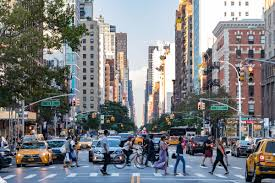

In [106]:
Image(filename=output_pic) 

In [107]:
output_phrase

'I am so happy there are trees in the world to help us breathe.'